# The Battle of Neighborhoods

## Table of contents

    Introduction
    Data Collection
    Method
    Results and Discussion
    Conclusion

### Introduction

In this hypothetical scenario, a successful Chinese restaurant is looking to expand their business into a new city in the United States. 
This Szechuan restaurant was opened up in 2013 at a college town and sooner become one of most populor Chinese restaurant in town. Recently, the owners would like to expand the family business to West Coast. Los Angeles, California is the first choice.

The owners had conducted market research and is confident that the taste of their restaurant would be the dominator in town. However, not knowing the city well, the owners have difficulties to identify the best neighbourhood to open their business.

Based on the family’s experiences with their restaurant, seeking out an area that already attracts diners who enjoy Chinese cuisine would be a good indicator for the location of the new restaurant.

### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

# distance from 2 sets of latitude and longitude 
from math import sin, cos, sqrt, atan2, radians

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Data Collection

In order to answer this question, we need to collect data from several sources.

1. Foursquare location data. 
   <br>Source: the Foursquare API
<br>
<br>
2. Median Household incomes for Los Angeles neighbourhoods. 
   <br>Source: [U.S. Census Bureau](http://data.census.gov)

#### Data Preparation

In order to utilize the Foursquare API the following information was needed:

- A list of Los Angeles neighbourhoods
- The post codes of each neighbourhood
- Latitude and longitude co-ordinates for each post code.

This data was found at the following website: 
https://www.geonames.org/postalcode-search.html?q=Los+Angeles&country=US

The data was scrapped and then cleaned through a series of steps into a data frame of 4 features, Neighbourhood, Postcode, Latitude, and Longitude.

The Folium library was then used as a visual aid while examining the data, rendering maps of LA's neighbourhoods. Later in the analysis folium was be used to show the different venue clusters that were identified using machine learning methods. Once the neighbourhood data was arranged into a workable data frame, The Foursquare API software identified:
- The different types of venues (e.g., restaurants, parks) in each neighbourhood.
- The popularity of each venue in each of these neighbourhoods.
- The focus of our search will be on the " Food " category, specifically on Chinese cuisine.

The following steps show the data cleaning steps needed to present a data frame of the relevant information needed. This data frame should have 4 features "PostCode", "Neighbourhood", "Latitude", "Longitude".

In [2]:
geonames = pd.read_html('https://www.geonames.org/postalcode-search.html?q=Los+Angeles&country=US')

In [3]:
LA_post_df = geonames[2]
LA_post_df

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Beverly Hills,90210,United States,California,Los Angeles,NaN
1,NaN,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406
2,2.0,Los Angeles,90002,United States,California,Los Angeles,NaN
3,NaN,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246
4,3.0,Los Angeles,90003,United States,California,Los Angeles,NaN
5,NaN,33.965/-118.273,33.965/-118.273,33.965/-118.273,33.965/-118.273,33.965/-118.273,33.965/-118.273
6,4.0,Los Angeles,90004,United States,California,Los Angeles,NaN
7,NaN,34.076/-118.303,34.076/-118.303,34.076/-118.303,34.076/-118.303,34.076/-118.303,34.076/-118.303
8,5.0,Los Angeles,90006,United States,California,Los Angeles,NaN
9,NaN,34.049/-118.292,34.049/-118.292,34.049/-118.292,34.049/-118.292,34.049/-118.292,34.049/-118.292


In [4]:
LA_post_df.columns = ['Unnamed', 'Neighbourhoods', 'PostCode', 'Country', 'Admin1', 'Admin2', 'Admin3']
LA_post = LA_post_df.drop(['Unnamed','Admin1','Admin2', 'Admin3','Country'], axis=1)
LA_post = LA_post.dropna(axis = 0, how ='any')
LA_post.head()

,Neighbourhoods,PostCode
0,Beverly Hills,90210
1,34.09/-118.406,34.09/-118.406
2,Los Angeles,90002
3,33.95/-118.246,33.95/-118.246
4,Los Angeles,90003


In [5]:
#extract row[0,2,4,...] to obtain only Neighbourhoods and PostCode

LA_nbh_post = LA_post.iloc[::2].reset_index(drop=True)
LA_nbh_post

,Neighbourhoods,PostCode
0,Beverly Hills,90210
1,Los Angeles,90002
2,Los Angeles,90003
3,Los Angeles,90004
4,Los Angeles,90006
5,Los Angeles,90012
6,Los Angeles,90017
7,Los Angeles,90018
8,Los Angeles,90020
9,Los Angeles,90024


In [6]:
#extract row[1,3,5,...] to obtain geo data

#split PostCode col to have Latitude and Longitude separately 
LA_geo = LA_post['PostCode']
LA_geoSplit = LA_geo.str.split("/", n = 1, expand = True) 
LA_geoSplit.columns = ['Latitude', 'Longitude']
LA_geoSplit.head()

,Latitude,Longitude
0,90210,None
1,34.09,-118.406
2,90002,None
3,33.95,-118.246
4,90003,None


In [7]:
#drop unuseful rows row[0,2,4,...]
LA_geodata = LA_geoSplit.iloc[1::2].reset_index(drop=True)
LA_geodata

,Latitude,Longitude
0,34.09,-118.406
1,33.95,-118.246
2,33.965,-118.273
3,34.076,-118.303
4,34.049,-118.292
5,34.061,-118.238
6,34.056,-118.267
7,34.029,-118.315
8,34.067,-118.302
9,34.064,-118.441


In [8]:
#Concatenate LA_nbh_post (Neighbourhoods and PostCode) and LA_geodata (geo data)
LA_geodf = pd.concat([LA_nbh_post, LA_geodata], axis=1, ignore_index=True)
LA_geodf.columns = ['Neighbourhoods','PostCode', 'Latitude', 'Longitude']
LA_geodf

,Neighbourhoods,PostCode,Latitude,Longitude
0,Beverly Hills,90210,34.09,-118.406
1,Los Angeles,90002,33.95,-118.246
2,Los Angeles,90003,33.965,-118.273
3,Los Angeles,90004,34.076,-118.303
4,Los Angeles,90006,34.049,-118.292
5,Los Angeles,90012,34.061,-118.238
6,Los Angeles,90017,34.056,-118.267
7,Los Angeles,90018,34.029,-118.315
8,Los Angeles,90020,34.067,-118.302
9,Los Angeles,90024,34.064,-118.441


In [9]:
#convert latitude and latitude to float for maping by folium
LA_geodf['Latitude']= LA_geodf['Latitude'].astype(float)
LA_geodf['Longitude']= LA_geodf['Longitude'].astype(float)

In [10]:
print(LA_geodf.shape)
print(LA_geodf.dtypes)

(200, 4)
Neighbourhoods     object
PostCode           object
Latitude          float64
Longitude         float64
dtype: object


In [11]:
LA_geodf.isnull().values.any()

False

#### Map of Los Angeles Neighbourhoods

In [12]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.242766.


In [13]:
# create map of Los Angeles using latitude and longitude values
map_LA = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, PostCode in zip(LA_geodf['Latitude'], LA_geodf['Longitude'], LA_geodf['PostCode']):
    label = '{}'.format(PostCode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
    
map_LA

#### Neighbourhood - Foursquare

For this step the Foursquare API was used to build a list of venues of up to 100 candidates, within a 500 metre radius of each of LA's neighbourhood centroids.

The venue search include only data from the "Food" and "Chinese restaurant" categories.

The category ID's needed for ths search were taken from the Foursquare library "https://developer.foursquare.com/docs/build-with-foursquare/categories/" , and listed below.



- Asian Restaurant: 4bf58dd8d48988d142941735
- Chinese Restaurant: 4bf58dd8d48988d145941735

Here is a table of all subcategories listed under the Chinese restaurant category.
<br>Source: https://developer.foursquare.com/docs/build-with-foursquare/categories/

|    | Subcategory                   | ID                       |
|:--:|-------------------------------|--------------------------|
|  1 | Anhui Restaurant              | 52af3a5e3cf9994f4e043bea |
|  2 | Beijing Restaurant            | 52af3a723cf9994f4e043bec |
|  3 | Cantonese Restaurant          | 52af3a7c3cf9994f4e043bed |
|  4 | Cha Chaan Teng                | 58daa1558bbb0b01f18ec1d3 |
|  5 | Chinese Aristocrat Restaurant | 52af3a673cf9994f4e043beb |
|  6 | Chinese Breakfast Place       | 52af3a903cf9994f4e043bee |
|  7 | Dim Sum Restaurant            | 4bf58dd8d48988d1f5931735 |
|  8 | Dongbei Restaurant            | 52af3a9f3cf9994f4e043bef |
|  9 | Fujian Restaurant             | 52af3aaa3cf9994f4e043bf0 |
| 10 | Guizhou Restaurant            | 52af3ab53cf9994f4e043bf1 |
| 11 | Hainan Restaurant             | 52af3abe3cf9994f4e043bf2 |
| 12 | Hakka Restaurant              | 52af3ac83cf9994f4e043bf3 |
| 13 | Henan Restaurant              | 52af3ad23cf9994f4e043bf4 |
| 14 | Hong Kong Restaurant          | 52af3add3cf9994f4e043bf5 |
| 15 | Huaiyang Restaurant           | 52af3af23cf9994f4e043bf7 |
| 16 | Hubei Restaurant              | 52af3ae63cf9994f4e043bf6 |
| 17 | Hunan Restaurant              | 52af3afc3cf9994f4e043bf8 |
| 18 | Imperial Restaurant           | 52af3b053cf9994f4e043bf9 |
| 19 | Jiangsu Restaurant            | 52af3b213cf9994f4e043bfa |
| 20 | Jiangxi Restaurant            | 52af3b293cf9994f4e043bfb |
| 21 | Macanese Restaurant           | 52af3b343cf9994f4e043bfc |
| 22 | Manchu Restaurant             | 52af3b3b3cf9994f4e043bfd |
| 23 | Peking Duck Restaurant        | 52af3b463cf9994f4e043bfe |
| 24 | Shaanxi Restaurant            | 52af3b633cf9994f4e043c01 |
| 25 | Shandong Restaurant           | 52af3b513cf9994f4e043bff |
| 26 | Shanghai Restaurant           | 52af3b593cf9994f4e043c00 |
| 27 | Shanxi Restaurant             | 52af3b6e3cf9994f4e043c02 |
| 28 | Szechuan Restaurant           | 52af3b773cf9994f4e043c03 |
| 29 | Taiwanese Restaurant          | 52af3b813cf9994f4e043c04 |
| 30 | Tianjin Restaurant            | 52af3b893cf9994f4e043c05 |
| 31 | Xinjiang Restaurant           | 52af3b913cf9994f4e043c06 |
| 32 | Yunnan Restaurant             | 52af3b9a3cf9994f4e043c07 |
| 33 | Zhejiang Restaurant           | 52af3ba23cf9994f4e043c08 |

#### Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'PTXMCCENEXIPMMEVQYN5SNKFFLBNBNT0TOO3CR2JL4PG2XVN' # your Foursquare ID
CLIENT_SECRET = 'DGADL4FXJRVGTN4VPTP44NYQDQOUGPUMGMVEYXRYAACWBRHZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PTXMCCENEXIPMMEVQYN5SNKFFLBNBNT0TOO3CR2JL4PG2XVN
CLIENT_SECRET:DGADL4FXJRVGTN4VPTP44NYQDQOUGPUMGMVEYXRYAACWBRHZ


In [15]:
food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

Chinese_restaurant = '4bf58dd8d48988d145941735' #sub-categories for Chinese restaurants

Chines_restaurant_categories = ['52af3a5e3cf9994f4e043bea',
                                '52af3a723cf9994f4e043bec', '52af3a7c3cf9994f4e043bed',
                                '58daa1558bbb0b01f18ec1d3', '52af3a673cf9994f4e043beb',
                                '52af3a903cf9994f4e043bee', '4bf58dd8d48988d1f5931735',
                                '52af3a9f3cf9994f4e043bef', '52af3aaa3cf9994f4e043bf0',
                                '52af3ab53cf9994f4e043bf1', '52af3abe3cf9994f4e043bf2', 
                                '52af3ac83cf9994f4e043bf3', '52af3ad23cf9994f4e043bf4', 
                                '52af3add3cf9994f4e043bf5', '52af3af23cf9994f4e043bf7', 
                                '52af3ae63cf9994f4e043bf6', '52af3afc3cf9994f4e043bf8', 
                                '52af3b053cf9994f4e043bf9', '52af3b213cf9994f4e043bfa', 
                                '52af3b293cf9994f4e043bfb', '52af3b343cf9994f4e043bfc', 
                                '52af3b3b3cf9994f4e043bfd', '52af3b463cf9994f4e043bfe', 
                                '52af3b633cf9994f4e043c01', '52af3b513cf9994f4e043bff', 
                                '52af3b593cf9994f4e043c00', '52af3b6e3cf9994f4e043c02', 
                                '52af3b773cf9994f4e043c03', '52af3b813cf9994f4e043c04', 
                                '52af3b893cf9994f4e043c05', '52af3b913cf9994f4e043c06',
                                '52af3b9a3cf9994f4e043c07', '52af3ba23cf9994f4e043c08']

def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT = 50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId=4bf58dd8d48988d145941735&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhoods', 
                  'Neighbourhoods Latitude', 
                  'Neighbourhoods Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
LA_venues = getNearbyVenues(names=LA_geodf['Neighbourhoods'],
                                   latitudes=LA_geodf['Latitude'],
                                   longitudes=LA_geodf['Longitude']                             
                                  )

Beverly Hills
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Lo

In [17]:
print(LA_venues.shape)
LA_venues.head()

(987, 7)


,Neighbourhoods,Neighbourhoods Latitude,Neighbourhoods Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Los Angeles,33.950,-118.246,Chinese Express,33.943531,-118.244736,Chinese Restaurant
1,Los Angeles,34.076,-118.303,Ocha Classic Thai-Chinese Food & BBQ Restaurant,34.068725,-118.300009,Chinese Restaurant
2,Los Angeles,34.076,-118.303,Zzamong,34.069255,-118.307191,Chinese Restaurant
3,Los Angeles,34.076,-118.303,Chinatown Express,34.076450,-118.300659,Chinese Restaurant
4,Los Angeles,34.076,-118.303,Chinatown Express,34.069648,-118.308868,Chinese Restaurant


In [18]:
LA_venues.isnull().values.any()

False

In [19]:
LA_venues.groupby('Neighbourhoods').count()

,Neighbourhoods Latitude,Neighbourhoods Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhoods,,,,,,
Arcadia,14,14,14,14,14,14
Beverly Hills,5,5,5,5,5,5
Canoga Park,11,11,11,11,11,11
Canyon Country,1,1,1,1,1,1
Castaic,2,2,2,2,2,2
Cerritos,6,6,6,6,6,6
Chatsworth,6,6,6,6,6,6
Downey,9,9,9,9,9,9
Encino,3,3,3,3,3,3


In [20]:
print('There are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))

There are 29 uniques categories.


In [21]:
LA_venues.groupby('Venue Category').count()

,Neighbourhoods,Neighbourhoods Latitude,Neighbourhoods Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Asian Restaurant,13,13,13,13,13,13
Breakfast Spot,5,5,5,5,5,5
Bubble Tea Shop,2,2,2,2,2,2
Buffet,2,2,2,2,2,2
Café,3,3,3,3,3,3
Cantonese Restaurant,34,34,34,34,34,34
Chinese Restaurant,779,779,779,779,779,779
Coffee Shop,7,7,7,7,7,7
Deli / Bodega,1,1,1,1,1,1


Data Preparation: Median household Income Data

The client wishes to attract returning patrons who are seeking a high-end dining experience. An initial way to explore this question would be to look at household incomes in the potential neighbourhoods, as household incomes (or disposable incomes) may provide an indication of the frequency potential customers might seek to dine out. Higher earners may be more inclined to seek out the more exclusive dining experiences the client wishes to provide in her restaurant.

Median household income data was taken from U.S. Census Bureau. The table, "MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)" were downloaded from http://data.census.gov


In [22]:
income_data=pd.read_csv('ACSST5Y2019.S1903.csv')
income_data.head()

/Users/lininin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,110,111,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,S1903_C01_005E,S1903_C01_005M,S1903_C01_006E,S1903_C01_006M,S1903_C01_007E,S1903_C01_007M,S1903_C01_008E,S1903_C01_008M,S1903_C01_009E,S1903_C01_009M,S1903_C01_010E,S1903_C01_010M,S1903_C01_011E,S1903_C01_011M,S1903_C01_012E,S1903_C01_012M,S1903_C01_013E,S1903_C01_013M,S1903_C01_014E,S1903_C01_014M,S1903_C01_015E,S1903_C01_015M,S1903_C01_016E,S1903_C01_016M,S1903_C01_017E,S1903_C01_017M,S1903_C01_018E,S1903_C01_018M,S1903_C01_019E,S1903_C01_019M,S1903_C01_020E,S1903_C01_020M,S1903_C01_021E,S1903_C01_021M,S1903_C01_022E,S1903_C01_022M,S1903_C01_023E,S1903_C01_023M,S1903_C01_024E,S1903_C01_024M,S1903_C01_025E,S1903_C01_025M,S1903_C01_026E,S1903_C01_026M,S1903_C01_027E,S1903_C01_027M,S1903_C01_028E,S1903_C01_028M,S1903_C01_029E,S1903_C01_029M,S1903_C01_030E,S1903_C01_030M,S1903_C01_031E,S1903_C01_031M,S1903_C01_032E,S1903_C01_032M,S1903_C01_033E,S1903_C01_033M,S1903_C01_034E,S1903_C01_034M,S1903_C01_035E,S1903_C01_035M,S1903_C01_036E,S1903_C01_036M,S1903_C01_037E,S1903_C01_037M,S1903_C01_038E,S1903_C01_038M,S1903_C01_039E,S1903_C01_039M,S1903_C01_040E,S1903_C01_040M,S1903_C02_001E,S1903_C02_001M,S1903_C02_002E,S1903_C02_002M,S1903_C02_003E,S1903_C02_003M,S1903_C02_004E,S1903_C02_004M,S1903_C02_005E,S1903_C02_005M,S1903_C02_006E,S1903_C02_006M,S1903_C02_007E,S1903_C02_007M,S1903_C02_008E,S1903_C02_008M,S1903_C02_009E,S1903_C02_009M,S1903_C02_010E,S1903_C02_010M,S1903_C02_011E,S1903_C02_011M,S1903_C02_012E,S1903_C02_012M,S1903_C02_013E,S1903_C02_013M,S1903_C02_014E,S1903_C02_014M,S1903_C02_015E,S1903_C02_015M,S1903_C02_016E,S1903_C02_016M,S1903_C02_017E,S1903_C02_017M,S1903_C02_018E,S1903_C02_018M,S1903_C02_019E,S1903_C02_019M,S1903_C02_020E,S1903_C02_020M,S1903_C02_021E,S1903_C02_021M,S1903_C02_022E,S1903_C02_022M,S1903_C02_023E,S1903_C02_023M,S1903_C02_024E,S1903_C02_024M,S1903_C02_025E,S1903_C02_025M,S1903_C02_026E,S1903_C02_026M,S1903_C02_027E,S1903_C02_027M,S1903_C02_028E,S1903_C02_028M,S1903_C02_029E,S1903_C02_029M,S1903_C02_030E,S1903_C02_030M,S1903_C02_031E,S1903_C02_031M,S1903_C02_032E,S1903_C02_032M,S1903_C02_033E,S1903_C02_033M,S1903_C02_034E,S1903_C02_034M,S1903_C02_035E,S1903_C02_035M,S1903_C02_036E,S1903_C02_036M,S1903_C02_037E,S1903_C02_037M,S1903_C02_038E,S1903_C02_038M,S1903_C02_039E,S1903_C02_039M,S1903_C02_040E,S1903_C02_040M,S1903_C03_001E,S1903_C03_001M,S1903_C03_002E,S1903_C03_002M,S1903_C03_003E,S1903_C03_003M,S1903_C03_004E,S1903_C03_004M,S1903_C03_005E,S1903_C03_005M,S1903_C03_006E,S1903_C03_006M,S1903_C03_007E,S1903_C03_007M,S1903_C03_008E,S1903_C03_008M,S1903_C03_009E,S1903_C03_009M,S1903_C03_010E,S1903_C03_010M,S1903_C03_011E,S1903_C03_011M,S1903_C03_012E,S1903_C03_012M,S1903_C03_013E,S1903_C03_013M,S1903_C03_014E,S1903_C03_014M,S1903_C03_015E,S1903_C03_015M,S1903_C03_016E,S1903_C03_016M,S1903_C03_017E,S1903_C03_017M,S1903_C03_018E,S1903_C03_018M,S1903_C03_019E,S1903_C03_019M,S1903_C03_020E,S1903_C03_020M,S1903_C03_021E,S1903_C03_021M,S1903_C03_022E,S1903_C03_022M,S1903_C03_023E,S1903_C03_023M,S1903_C03_024E,S1903_C03_024M,S1903_C03_025E,S1903_C03_025M,S1903_C03_026E,S1903_C03_026M,S1903_C03_027E,S1903_C03_027M,S1903_C03_028E,S1903_C03_028M,S1903_C03_029E,S1903_C03_029M,S1903_C03_030E,S1903_C03_030M,S1903_C03_031E,S1903_C03_031M,S1903_C03_032E,S1903_C03_032M,S1903_C03_033E,S1903_C03_033M,S1903_C03_034E,S1903_C03_034M,S1903_C03_035E,S1903_C03_035M,S1903_C03_036E,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M
0,id,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of E

In [23]:
#This income dataset contains other characteristics by race
#We only extract zip code (NAME) and household income (S1903_C01_001E)

income_data2 = income_data[['NAME','S1903_C01_001E']].drop(0).reset_index(drop=True)
income_data2.head()

,NAME,S1903_C01_001E
0,ZCTA5 35004,4624
1,ZCTA5 35005,2697
2,ZCTA5 35006,1018
3,ZCTA5 35007,9292
4,ZCTA5 35010,7987


In [24]:
income_data3 = income_data2['NAME'].str.split(" ", n = 1, expand = True) #split NAME column 
income_data3 = income_data3.drop(0,axis=1) #drop unuseful 'ZCTA5' column
income_data4 = pd.concat([income_data3, income_data2], axis=1, ignore_index=True) #concatenate two columns
income_data5 = income_data4.drop(1, axis=1)
income_data5.columns=['PostCode', 'Income']
income_data5.head()

,PostCode,Income
0,35004,4624
1,35005,2697
2,35006,1018
3,35007,9292
4,35010,7987


In [25]:
#convert latitude and latitude to float for maping by folium
income_data5['Income']= income_data5['Income'].astype(float)

In [26]:
print(income_data5.shape)
print(income_data5.dtypes)

(33120, 2)
PostCode     object
Income      float64
dtype: object


In [27]:
LA_geodf.head()


,Neighbourhoods,PostCode,Latitude,Longitude
0,Beverly Hills,90210,34.090,-118.406
1,Los Angeles,90002,33.950,-118.246
2,Los Angeles,90003,33.965,-118.273
3,Los Angeles,90004,34.076,-118.303
4,Los Angeles,90006,34.049,-118.292


In [28]:
income_data5.head()

,PostCode,Income
0,35004,4624.0
1,35005,2697.0
2,35006,1018.0
3,35007,9292.0
4,35010,7987.0


In [29]:
income_nbh_geo = result = pd.merge(income_data5, LA_geodf, how="inner", on=["PostCode"])

In [30]:
income_nbh_geo.sort_values(by=['Income'], ascending=False)

,PostCode,Income,Neighbourhoods,Latitude,Longitude
72,90250,31905.0,Hawthorne,33.914,-118.349
41,90044,29029.0,Los Angeles,33.955,-118.290
43,90046,29025.0,Los Angeles,34.107,-118.365
24,90026,26045.0,Los Angeles,34.077,-118.265
56,90066,25785.0,Los Angeles,34.003,-118.430
31,90034,25248.0,Los Angeles,34.029,-118.400
114,91342,25121.0,Sylmar,34.305,-118.432
17,90019,24464.0,Los Angeles,34.048,-118.334
9,90011,24433.0,Los Angeles,34.008,-118.258
113,91335,24391.0,Reseda,34.201,-118.539


### Method

Part 1 will use:

- the Foursquare API to identify the top venues in each neighbourhood.
- K-means clustering to sort the neighbourhoods into similar clusters based on the Foursquare venue data.
- Folium to visualise the clusters on a map of the Los Angeles region.

Part 2 will:

- compare median household incomes against the selected cluster of neighbourhoods.
- compare the distances between the city centre and each of the selected neighbourhoods.

#### Part 1 - Analysis: Foursquare

The analysis began with determining the density of restaurants in each neighbourhood, followed by grouping them into which venues were the most popular. In this case the top 10 venues for each neighbourhood were presented.

In [31]:
# one hot encoding
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Neighbourhoods'] = LA_venues['Neighbourhoods'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighbourhoods,Asian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dim Sum Restaurant,Diner,Dongbei Restaurant,Food Court,Food Truck,Fried Chicken Joint,Hawaiian Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Japanese Restaurant,Kosher Restaurant,Market,Mediterranean Restaurant,Noodle House,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Thai Restaurant
0,Los Angeles,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Los Angeles,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Los Angeles,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Los Angeles,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Los Angeles,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
LA_onehot.shape

(987, 30)

In [33]:
LA_grouped = LA_onehot.groupby('Neighbourhoods').mean().reset_index()
LA_grouped.head()

,Neighbourhoods,Asian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dim Sum Restaurant,Diner,Dongbei Restaurant,Food Court,Food Truck,Fried Chicken Joint,Hawaiian Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Japanese Restaurant,Kosher Restaurant,Market,Mediterranean Restaurant,Noodle House,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Thai Restaurant
0,Arcadia,0.0,0.071429,0.0,0.0,0.0,0.071429,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.214286,0.0
1,Beverly Hills,0.0,0.000000,0.0,0.0,0.0,0.000000,0.800000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,Canoga Park,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,Canyon Country,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,Castaic,0.0,0.000000,0.0,0.0,0.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5


In [34]:
LA_grouped.shape

(45, 30)

In [35]:
LA_grouped.isnull().values.any()

False

In [36]:
# Frequency of top 10 venues in each neighbourhood
num_top_venues = 10

for hood in LA_grouped['Neighbourhoods']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arcadia----
                  venue  freq
0    Chinese Restaurant  0.43
1  Taiwanese Restaurant  0.21
2   Szechuan Restaurant  0.07
3   Shanghai Restaurant  0.07
4  Cantonese Restaurant  0.07
5        Breakfast Spot  0.07
6     Hotpot Restaurant  0.07
7      Asian Restaurant  0.00
8  Hong Kong Restaurant  0.00
9    Seafood Restaurant  0.00


----Beverly Hills----
                  venue  freq
0    Chinese Restaurant   0.8
1         Deli / Bodega   0.2
2      Asian Restaurant   0.0
3  Hong Kong Restaurant   0.0
4  Taiwanese Restaurant   0.0
5   Szechuan Restaurant   0.0
6   Shanghai Restaurant   0.0
7    Seafood Restaurant   0.0
8        Sandwich Place   0.0
9          Noodle House   0.0


----Canoga Park----
                      venue  freq
0        Chinese Restaurant   1.0
1          Asian Restaurant   0.0
2       Hawaiian Restaurant   0.0
3      Taiwanese Restaurant   0.0
4       Szechuan Restaurant   0.0
5       Shanghai Restaurant   0.0
6        Seafood Restaurant   0.0
7     

9  Mediterranean Restaurant   0.0


----Valley Village----
                      venue  freq
0        Chinese Restaurant   1.0
1          Asian Restaurant   0.0
2       Hawaiian Restaurant   0.0
3      Taiwanese Restaurant   0.0
4       Szechuan Restaurant   0.0
5       Shanghai Restaurant   0.0
6        Seafood Restaurant   0.0
7            Sandwich Place   0.0
8              Noodle House   0.0
9  Mediterranean Restaurant   0.0


----Venice----
                  venue  freq
0    Chinese Restaurant  0.67
1           Coffee Shop  0.33
2      Asian Restaurant  0.00
3  Hong Kong Restaurant  0.00
4  Taiwanese Restaurant  0.00
5   Szechuan Restaurant  0.00
6   Shanghai Restaurant  0.00
7    Seafood Restaurant  0.00
8        Sandwich Place  0.00
9          Noodle House  0.00


----West Hills----
                      venue  freq
0        Chinese Restaurant   1.0
1          Asian Restaurant   0.0
2       Hawaiian Restaurant   0.0
3      Taiwanese Restaurant   0.0
4       Szechuan Restaurant  

Now we arrange the 10 most common venues in each Neighbourhood into a data frame

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
LA_neighbour_venues_sorted = pd.DataFrame(columns=columns)
LA_neighbour_venues_sorted['Neighbourhoods'] = LA_grouped['Neighbourhoods']

for ind in np.arange(LA_grouped.shape[0]):
    LA_neighbour_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)

In [39]:
LA_neighbour_venues_sorted

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arcadia,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Breakfast Spot,Cantonese Restaurant,Hotpot Restaurant,Thai Restaurant,Dongbei Restaurant,Bubble Tea Shop
1,Beverly Hills,Chinese Restaurant,Deli / Bodega,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop
2,Canoga Park,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
3,Canyon Country,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
4,Castaic,Thai Restaurant,Chinese Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
5,Cerritos,Chinese Restaurant,Bubble Tea Shop,Cantonese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Buffet,Café,Coffee Shop,Deli / Bodega
6,Chatsworth,Chinese Restaurant,Diner,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop
7,Downey,Chinese Restaurant,Asian Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
8,Encino,Chinese Restaurant,Breakfast Spot,Thai Restaurant,Food Truck,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
9,Gardena,Chinese Restaurant,Hong Kong Restaurant,Taiwanese Restaurant,Thai Restaurant,Food Court,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant


#### Part 1 - Analysis: K-means

The next step was to employ K-means clustering to organise the top venues into clusters of neighbourhoods based on the most common venues. The clusters were displayed using Folium software, and tables generated for each cluster.

First lets find out how many clusters we should use.

In [40]:
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [41]:
max_range = 8
LA_clustering = LA_grouped.drop('Neighbourhoods', 1)

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = LA_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

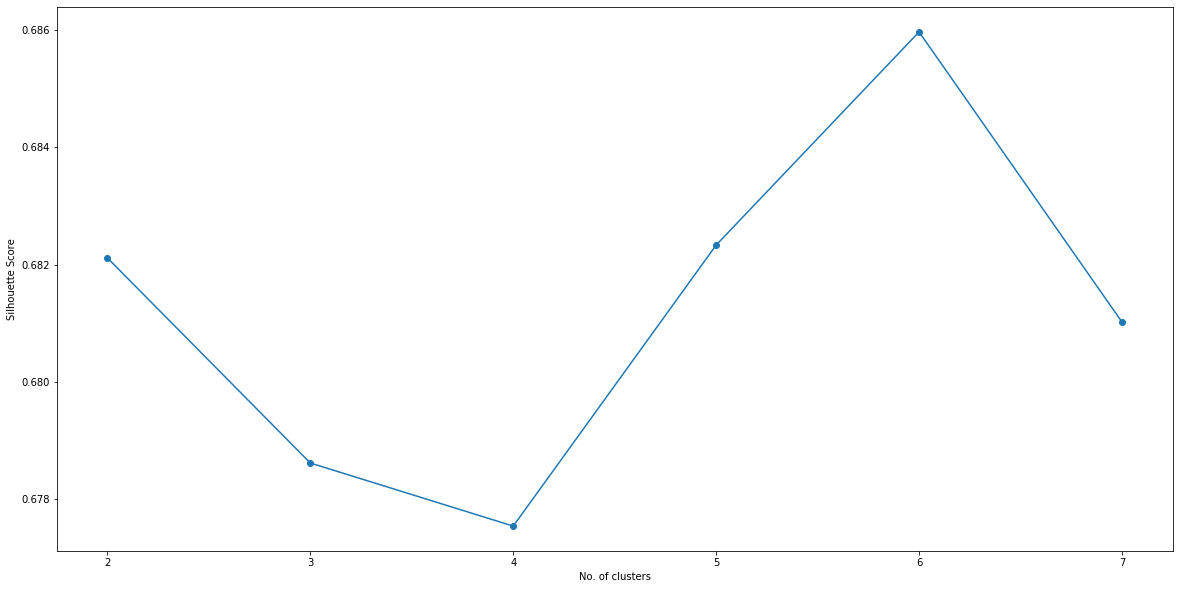

In [42]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

Therefore, we chose 2 clusters.

In [43]:
# set number of clusters
kclusters = 6
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 2, 0, 0, 4, 2, 2, 0, 3, 2], dtype=int32)

In [44]:
# add clustering labels
LA_neighbour_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LA_final = LA_geodf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
LA_final = LA_final.join(LA_neighbour_venues_sorted.set_index('Neighbourhoods'), on='Neighbourhoods')

LA_final.head() # check the last columns!

,Neighbourhoods,PostCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beverly Hills,90210,34.090,-118.406,2.0,Chinese Restaurant,Deli / Bodega,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop
1,Los Angeles,90002,33.950,-118.246,2.0,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
2,Los Angeles,90003,33.965,-118.273,2.0,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
3,Los Angeles,90004,34.076,-118.303,2.0,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
4,Los Angeles,90006,34.049,-118.292,2.0,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot


In [45]:
LA_final.isnull().values.any()


True

In [46]:
LA_dropNAN = LA_final.dropna()

In [47]:
LA_dropNAN.isnull().values.any()


False

Using Folium we can now plot on a map the locations of the 3 clusters.

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LA_dropNAN['Latitude'], LA_dropNAN['Longitude'], LA_dropNAN['Neighbourhoods'], LA_dropNAN['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1], #cluster-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1], #cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster #0

In [49]:
LA_dropNAN.loc[LA_dropNAN['Cluster Labels'] == 0, LA_dropNAN.columns[[0] + list(range(5, LA_dropNAN.shape[1]))]]

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
96,Montrose,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
97,Montrose,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
98,Sunland,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
99,Sunland,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
101,Winnetka,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
107,Sylmar,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
108,Valencia,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
109,Valencia,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
110,Tarzana,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
111,Tarzana,Chinese Restaurant,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega


#### Cluster #1

In [50]:
LA_dropNAN.loc[LA_dropNAN['Cluster Labels'] == 1, LA_dropNAN.columns[[0] + list(range(5, LA_dropNAN.shape[1]))]]

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
132,Northridge,Chinese Restaurant,Asian Restaurant,Mediterranean Restaurant,Coffee Shop,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant
133,Northridge,Chinese Restaurant,Asian Restaurant,Mediterranean Restaurant,Coffee Shop,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant
134,Northridge,Chinese Restaurant,Asian Restaurant,Mediterranean Restaurant,Coffee Shop,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant
135,Northridge,Chinese Restaurant,Asian Restaurant,Mediterranean Restaurant,Coffee Shop,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant
136,Northridge,Chinese Restaurant,Asian Restaurant,Mediterranean Restaurant,Coffee Shop,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant
137,Northridge,Chinese Restaurant,Asian Restaurant,Mediterranean Restaurant,Coffee Shop,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant
174,Venice,Chinese Restaurant,Coffee Shop,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Deli / Bodega
176,Venice,Chinese Restaurant,Coffee Shop,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Deli / Bodega


#### Cluster #2

In [51]:
LA_dropNAN.loc[LA_dropNAN['Cluster Labels'] == 2, LA_dropNAN.columns[[0] + list(range(5, LA_dropNAN.shape[1]))]]

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beverly Hills,Chinese Restaurant,Deli / Bodega,Thai Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop
1,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
2,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
3,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
4,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
5,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
6,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
7,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
8,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot
9,Los Angeles,Chinese Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Market,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Asian Restaurant,Szechuan Restaurant,Breakfast Spot


#### Cluster #3

In [52]:
LA_dropNAN.loc[LA_dropNAN['Cluster Labels'] == 3, LA_dropNAN.columns[[0] + list(range(5, LA_dropNAN.shape[1]))]]

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
131,Encino,Chinese Restaurant,Breakfast Spot,Thai Restaurant,Food Truck,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega


#### Cluster #4

In [53]:
LA_dropNAN.loc[LA_dropNAN['Cluster Labels'] == 4, LA_dropNAN.columns[[0] + list(range(5, LA_dropNAN.shape[1]))]]

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
130,Castaic,Thai Restaurant,Chinese Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega
150,Castaic,Thai Restaurant,Chinese Restaurant,Food Truck,Breakfast Spot,Bubble Tea Shop,Buffet,Café,Cantonese Restaurant,Coffee Shop,Deli / Bodega


#### Cluster #5

In [54]:
LA_dropNAN.loc[LA_dropNAN['Cluster Labels'] == 5, LA_dropNAN.columns[[0] + list(range(5, LA_dropNAN.shape[1]))]]

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
158,Arcadia,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Breakfast Spot,Cantonese Restaurant,Hotpot Restaurant,Thai Restaurant,Dongbei Restaurant,Bubble Tea Shop


#### Part 2 - Analysis (Median Incomes):

In [55]:
mean_df = income_nbh_geo[['Neighbourhoods','Income']].groupby('Neighbourhoods').mean().round(0)
mean_df.columns = ['Income_mean']

stddev_df = income_nbh_geo[['Neighbourhoods','Income']].groupby('Neighbourhoods').std().round(0)
stddev_df.columns = ['Income_stddev']


In [56]:
nbh_income_stats = pd.merge(mean_df,stddev_df, on = 'Neighbourhoods', left_index = True)
nbh_income_stats.head(10)

,Income_mean,Income_stddev
Neighbourhoods,,
Agoura Hills,9295.0,NaN
Altadena,12669.0,NaN
Arcadia,10575.0,NaN
Beverly Hills,6912.0,1449.0
Calabasas,9488.0,NaN
Canoga Park,13802.0,5240.0
Canyon Country,10076.0,NaN
Castaic,7091.0,NaN
Cerritos,15515.0,NaN


In [57]:
nbh_income_stats = pd.merge(nbh_income_stats,income_nbh_geo, on = 'Neighbourhoods', left_index = True)
nbh_income_stats.head(10)

,Neighbourhoods,Income_mean,Income_stddev,PostCode,Income,Latitude,Longitude
100,Agoura Hills,9295.0,NaN,91301,9295.0,34.123,-118.757
92,Altadena,12669.0,NaN,91001,12669.0,34.191,-118.139
93,Arcadia,10575.0,NaN,91006,10575.0,34.132,-118.026
65,Beverly Hills,6912.0,1449.0,90210,7936.0,34.090,-118.406
66,Beverly Hills,6912.0,1449.0,90212,5887.0,34.062,-118.400
101,Calabasas,9488.0,NaN,91302,9488.0,34.142,-118.664
102,Canoga Park,13802.0,5240.0,91303,10097.0,34.199,-118.598
103,Canoga Park,13802.0,5240.0,91304,17508.0,34.220,-118.611
118,Canyon Country,10076.0,NaN,91351,10076.0,34.426,-118.449
126,Castaic,7091.0,NaN,91384,7091.0,34.483,-118.625


In [58]:
nbh_income_stats['Income_stddev'] = nbh_income_stats['Income_stddev'].fillna(0)
nbh_income_stats.head(10)

,Neighbourhoods,Income_mean,Income_stddev,PostCode,Income,Latitude,Longitude
100,Agoura Hills,9295.0,0.0,91301,9295.0,34.123,-118.757
92,Altadena,12669.0,0.0,91001,12669.0,34.191,-118.139
93,Arcadia,10575.0,0.0,91006,10575.0,34.132,-118.026
65,Beverly Hills,6912.0,1449.0,90210,7936.0,34.090,-118.406
66,Beverly Hills,6912.0,1449.0,90212,5887.0,34.062,-118.400
101,Calabasas,9488.0,0.0,91302,9488.0,34.142,-118.664
102,Canoga Park,13802.0,5240.0,91303,10097.0,34.199,-118.598
103,Canoga Park,13802.0,5240.0,91304,17508.0,34.220,-118.611
118,Canyon Country,10076.0,0.0,91351,10076.0,34.426,-118.449
126,Castaic,7091.0,0.0,91384,7091.0,34.483,-118.625


In [59]:
Cluster = nbh_income_stats[nbh_income_stats['Neighbourhoods'].isin(['Beverly Hills','Los Angeles','Chatsworth','Sherman Oaks',
                                                   'Studio City','Gardena','Cerritos','Lomita'])]
Cluster

,Neighbourhoods,Income_mean,Income_stddev,PostCode,Income,Latitude,Longitude
65,Beverly Hills,6912.0,1449.0,90210,7936.0,34.090,-118.406
66,Beverly Hills,6912.0,1449.0,90212,5887.0,34.062,-118.400
85,Cerritos,15515.0,0.0,90703,15515.0,33.867,-118.069
106,Chatsworth,14283.0,0.0,91311,14283.0,34.258,-118.591
69,Gardena,9535.0,6143.0,90247,16001.0,33.892,-118.296
70,Gardena,9535.0,6143.0,90248,3777.0,33.877,-118.284
71,Gardena,9535.0,6143.0,90249,8826.0,33.900,-118.320
87,Lomita,8477.0,0.0,90717,8477.0,33.794,-118.317
0,Los Angeles,13303.0,7589.0,90001,13669.0,33.973,-118.248
1,Los Angeles,13303.0,7589.0,90002,12917.0,33.950,-118.246


In [60]:
Cluster.dtypes

Neighbourhoods     object
Income_mean       float64
Income_stddev     float64
PostCode           object
Income            float64
Latitude          float64
Longitude         float64
dtype: object

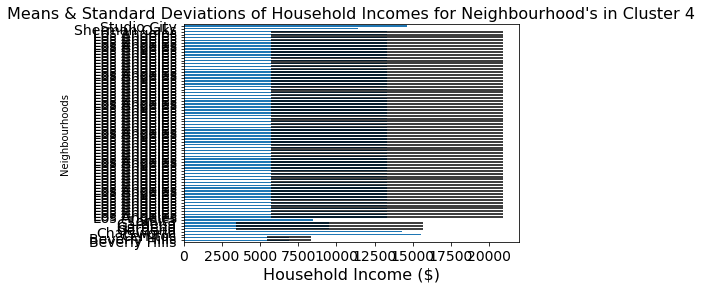

In [61]:
Cluster.plot(kind = "barh", x = "Neighbourhoods", y = "Income_mean", xerr = "Income_stddev", legend = False, fontsize = 14) 
plt.xlabel("Household Income ($)", fontsize=16),
plt.title("Means & Standard Deviations of Household Incomes for Neighbourhood's in Cluster 4", fontsize=16)
font = {'family' : 'Times New Roman', 'weight' : 'bold'}
plt.show()